# Customer Propensity Analysis using Python #
This problem is on Customer Propensity Analysis using multiple Machine Learning Models - Naive Bayes and Logistic Regression. The main objective of this problem is seeing which model gives the best result and finding the optimum prediction model to understand customer behaviour.   
There is a dataset from an online portal which gives users' demographic information, their transactional history in the online portal, the price of the item he has viewed and whether the user has ultimately purchased it or not.

In [1]:
product.head()

NameError: name 'product' is not defined

So we are seeing that we have data on User_Gender, Marital_status, Price of the item the user has viewed, Number of items he has purchased from the website, total value of the transactions he has done before in the web portal, income of the person and lastly whether the user has purchased the current item or not. There are 11155 records. It is needed to develop a predictive model, which can predict for any new user with the above information (except whether he has purchaed or not) that whether the user will be purchasing or not. 
We need to perform the following activities in order to solve the problem.

### 1. Importing Data
### 2. Cleaning, Preparing and Manipulating Data
### 3. Training and Testing Different Machine Learning Models
### 4. Improving the Models

# 1. Importing the Data #
First we need to import the data. Before that we need to load some useful libraries. 
We need to load the library 'sklearn' which gives us the option to work with Random Forest Classifier. The same 'sklearn' library gives us the option to split a dataset into train and test set using 'cross_validation' function.
We will be needing to import matplotlib library for doing some plots.
We will be needing pandas as it is the basic package for importing a dataset and performing other data-related manipulation activities. 
We will be using Numpy package for using the arrays.
We will be using seaborn package for using heat-map. 
We will be loading LogisticRegression function from sklearn for fitting Logistic Regression model. We will loading DecisionTreeClassifier function from sklearn for performing Decision Tree classification. We will be loading KNeighboursClassifier from sklearn for performing K-NN classification. We will be loading SVC function for performing Support Vector Machine classification. 

In [2]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns

We are importing the dataset using 'read_csv' function of Panda library. 

In [3]:
product = pd.read_csv('PURCHASE.csv')

We can see what data has been uploaded in the Python system using 'print' function. 

In [4]:
product.head()


,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE
0,1,M,25000,0,0,39171,0
1,1,U,20000,2,21866,249,1
2,0,U,30000,1,16090,1249,0
3,0,U,15000,0,0,7247,1
4,1,U,28000,2,26888,33314,1


If we can see the above data, it means the dataset has been imported correctly. Next we need to move to the next part of our journey, i.e., 'Clean, Prepare and Manipulate the Data'.

# 2. Cleaning, Preparing and Manipulating the Data #

For getting an insight about the dataset, we can get a quick summary about the dataset using 'info' and 'describe()' function.

In [5]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11157 entries, 0 to 11156
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   USER_GENDER  11157 non-null  int64 
 1   MARITAL      11157 non-null  object
 2   PRICE        11157 non-null  int64 
 3   NO_ITEMS     11157 non-null  int64 
 4   PUR_VALUE    11157 non-null  int64 
 5   USER_INCOME  11157 non-null  int64 
 6   PURCHASE     11157 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 610.3+ KB


In [6]:
product.describe()

,USER_GENDER,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE
count,11157.000000,11157.000000,11157.000000,11157.000000,11157.000000,11157.000000
mean,0.499149,18241.193869,0.666487,6611.297392,11119.789370,0.331272
std,0.500022,6915.991488,0.659351,7581.662231,13055.545027,0.470692
min,0.000000,9000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13000.000000,0.000000,0.000000,561.000000,0.000000
50%,0.000000,16000.000000,1.000000,3505.000000,5724.000000,0.000000
75%,1.000000,24000.000000,1.000000,12613.000000,18018.000000,1.000000
max,1.000000,32000.000000,2.000000,29943.000000,49975.000000,1.000000


We have seen that marital status has been mentioned as 'M' (married) and 'U' umarried. We need to change this to '1' and '0' for further proceeding in our journey. We make the changes and then see what is the updated dataset.  

In [7]:
product = product.replace({'M':1, 'U':0})
product.head()

,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME,PURCHASE
0,1,1,25000,0,0,39171,0
1,1,0,20000,2,21866,249,1
2,0,0,30000,1,16090,1249,0
3,0,0,15000,0,0,7247,1
4,1,0,28000,2,26888,33314,1


We saw that 'M' and 'U' under martital status column has been converted to 1 and 0.
Now, we need to check whether there is any missing value in the data or not. 
For that we will be using the following code. 

In [8]:
product.isnull().sum(axis = 0)

USER_GENDER    0
MARITAL        0
PRICE          0
NO_ITEMS       0
PUR_VALUE      0
USER_INCOME    0
PURCHASE       0
dtype: int64

We find that there are no missing value in the data and hence we should not be bothered about this. We can use the dataset for further processing. 

## 3. Training and Testing Different ML Models ##
We have got some idea about the dataset by now. 
Now the time has come for building the model. 
Before building the model, we need create 2 arrays X and Y where X will be for the independent variables and Y will be fore the dependent variable (PURCHASE). 

In [9]:
X = np.array(product[['USER_GENDER', 'MARITAL', 'PRICE', 
                      'NO_ITEMS', 'PUR_VALUE', 'USER_INCOME']])
Y = np.array(product[['PURCHASE']])

In order to develop a machine learning model, it is needed to have a test dataset on which you will be checking how much accurate your model is. If you utilize the whole dataset for developing your model, then there will be no data for testing. Hence, it is a norm to bifurcate the dataset into train set and test set. We need to develop the model using the train set and test the accuracy of the model using the test set. 
Hence, we will be creating 4 arrays X_train, X_test, Y_train and Y_test for developing our  model. 

In [10]:
from sklearn import model_selection

X_train, X_test, Y_train, Y_test = model_selection.\
train_test_split(X, Y, test_size=0.2, random_state=25)

Now we will be fitting the Naive Bayes on the training dataset and check the accuracy of the Naive Bayes model using the Test Dataset. 

#### Naive Bayes Model

In [16]:
#Naive bayes
#Training Model
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, Y_train)
#option 1
#Testing Model
y_pred = nb.predict(X_test)
from sklearn.metrics import accuracy_score
print("Naive bayes Accuracy Score =", accuracy_score(Y_test, y_pred)*100)

#option 2
#print("Naive bayes Accuracy Score =",nb.score(X_test,Y_test)*100)

Naive bayes Accuracy Score = 73.16308243727599


/home/manu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We have got 73.16% accuracy from the Naive Bayes. Now let us check some other models. 
Next we will be checking Logistic Model. 

#### Logistic Regression Model

In [17]:
#Logistic Regression
#Training Model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
#option 1
#Testing Model
y_pred = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy Score =", accuracy_score(Y_test, y_pred)*100)

#option 2
#print("Logistic Regression Accuracy Score =",log_reg.score(X_test,Y_test)*100)

Logistic Regression Accuracy Score = 66.084229390681


/home/manu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We received accuracy of logistic regression model to be 66% which is very less.


Before building an appropriate model, we first need to see whether there is any multicollinearity in the data (independent variables) or not. If there is multi-collinearity in the data, it will increase the variance and ultimately it will lead to lesser accuracy. So we need to check the correlation matrix for the independent variables. 
For that we will first create a new dataframe 'product1' having only the independent variables. 

In [18]:
product1 = product.iloc[:,:-1]
product1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11157 entries, 0 to 11156
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   USER_GENDER  11157 non-null  int64
 1   MARITAL      11157 non-null  int64
 2   PRICE        11157 non-null  int64
 3   NO_ITEMS     11157 non-null  int64
 4   PUR_VALUE    11157 non-null  int64
 5   USER_INCOME  11157 non-null  int64
dtypes: int64(6)
memory usage: 523.1 KB


# We are creating a correlation matrix for 'product1'. 

In [19]:
product1.corr()

,USER_GENDER,MARITAL,PRICE,NO_ITEMS,PUR_VALUE,USER_INCOME
USER_GENDER,1.000000,0.004660,0.008056,0.008791,0.006565,0.481271
MARITAL,0.004660,1.000000,0.006684,0.011311,0.014041,0.047655
PRICE,0.008056,0.006684,1.000000,0.011312,0.017037,-0.002404
NO_ITEMS,0.008791,0.011311,0.011312,1.000000,0.810733,-0.001251
PUR_VALUE,0.006565,0.014041,0.017037,0.810733,1.000000,-0.000900
USER_INCOME,0.481271,0.047655,-0.002404,-0.001251,-0.000900,1.000000


From the correlation matrix, we are finding that Number of items and Purchase value are highly correlated. Let us create a heat-map which will give a better picture of the multi-collinearity. 

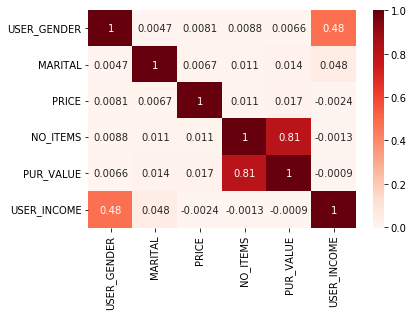

In [20]:
sns.heatmap(product1.corr(),annot = True,cmap='Reds')
plt.show()

The heat-map also tells that there are high correlation between Purchase Value and Number of items. From here we are also getting an idea that some correlation is there between user gender and user income. We can definitely consider one of the variable among the two - Purchase Value and Number of Items.

## 4. Improving the Models ##
We have seen Purchase Value and Number of items purchased are highly correlated. 
Hence, we are removing one variable (Purchase Value) and number of items (NO_ITEMS) is used as the independent varaible.
We follow the same process as before. 
We also have seen that in case of user income there are some outliers in the model and we have not treated those outliers. Hence, for the time-being, we are not considering the user income as independent variable and fitting the model without using that. 

In [22]:

from sklearn.naive_bayes import GaussianNB

X1 = np.array(product[['USER_GENDER','MARITAL','PRICE',
                       'NO_ITEMS', 'USER_INCOME']])
X1_train, X1_test, Y_train, Y_test = model_selection.train_test_split(X1, Y, test_size=0.2, random_state=25)
#Naive Bayes
nb=GaussianNB()
nb.fit(X1_train, Y_train)
print("Naive Bayes Accuracy Score =",nb.score(X1_test,Y_test)*100)


#Logistic Regression
#Training Model
log_reg = LogisticRegression()
log_reg.fit(X1_train, Y_train)
#Testing Model
print("Logistic Regression Accuracy Score =", log_reg.score(X1_test, Y_test)*100)


Naive Bayes Accuracy Score = 76.7921146953405
Logistic Regression Accuracy Score = 65.3673835125448


/home/manu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We will now see the impact of feature scaling in the model. 

In [23]:
X2 = np.array(product[['USER_GENDER','MARITAL','PRICE', 
                       'NO_ITEMS', 'USER_INCOME']])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#option 1
scaler.fit(X2)
X2 = scaler.transform(X2) 
#print(X2)

X2_train, X2_test, Y_train, Y_test = model_selection.\
train_test_split(X2, Y, test_size=0.2, random_state=25)
#Naive Bayes
nb=GaussianNB()
nb.fit(X2_train, Y_train)
print("Naive Bayes Accuracy Score =",nb.score(X2_test,Y_test)*100)


#Logistic Regression
#Training Model
log_reg = LogisticRegression()
log_reg.fit(X2_train, Y_train)
#Testing Model
print("Logistic Regression Accuracy Score =", log_reg.score(X2_test,
                                                            Y_test)*100)


Naive Bayes Accuracy Score = 76.7921146953405
Logistic Regression Accuracy Score = 76.7921146953405


/home/manu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:

X3 = np.array(product[['USER_GENDER','MARITAL','PRICE',
                       'NO_ITEMS', 'USER_INCOME']])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#option 1
scaler.fit(X3)
X3 = scaler.transform(X3) 

X3_train, X3_test, Y_train, Y_test = model_selection.\
train_test_split(X3, Y, test_size=0.2, random_state=25)
#Naive Bayes
nb=GaussianNB()
nb.fit(X3_train, Y_train)
print("Naive Bayes Accuracy Score =",nb.score(X3_test,Y_test)*100)


#Logistic Regression
#Training Model
log_reg = LogisticRegression()
log_reg.fit(X3_train, Y_train)
#Testing Model
print("Logistic Regression Accuracy Score =", log_reg.score(X3_test, Y_test)*100)

Naive Bayes Accuracy Score = 76.7921146953405
Logistic Regression Accuracy Score = 76.7921146953405


/home/manu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# ROC-AUC analysis..

In [25]:
probs1 = log_reg.predict_proba(X2_test)
probs2 = nb.predict_proba(X2_test)

In [26]:
probs1 = probs1[:, 1]
probs2 = probs2[:, 1]

In [27]:
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(Y_test, probs1)
auc2 = roc_auc_score(Y_test, probs2)
print('AUC=Logistic: %.2f' % auc1)
print('AUC=NB: %.2f' % auc2)

AUC=Logistic: 0.66
AUC=NB: 0.67
